Name: Nathan Dang

Partner: Charlie Poff-Webster

Date: 04/07/2020

DSCI225 - Applied Machine Learning

Instructor: Prof. Basye

# Lab 6 - All the Bells and Whistles

Our task in this lab was to complete Exercise 10 in Chapter 10 of the Hands-on ML textbook, in which we built a DNN for MNIST (the digits, not fashion), doing a careful job of finding a good learning rate and adding some "bells and whistles."

<b>NOTE</b>: we came up with our own approach which is different from the one suggested in the exercise's prompt because we didn't want to just copy and paste code from the solution. We marked checkpoints throughout our process which can be seen by the label of a progress log (i.e. "Progress Log 1," "Progress Log 2," etc) followed by a summary of what was going on on each checkpoint. The full documentation of the log can be found at the end of the notebook. 

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

### Progress Log 1

Import the tensorflow and keras package. The working envinronment must have tensorflow installed beforehand to run this notebook.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# import keras
from tensorflow import keras

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Preparing the data

We were asked to use the MNIST dataset from tensorflow for this lab.

### Progress Log 2

Import the keras package from tensorflow and get the MNIST dataset

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

Let's split the full training set into a validation set and a (smaller) training set. Instead of using 5000 images for the validation set and the rest for training set, we splitted using the ratio 7:3, i.e. the training set had 42000 images and the validation set had 18000 images. Also, the values of the images stayed the same instead of being scaled like in the chapter notebook.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=100, train_size=0.8) 

In [5]:
X_train.shape

(48000, 28, 28)

In [6]:
X_val.shape

(12000, 28, 28)

Let's have some visualisation of some images inside the training set.

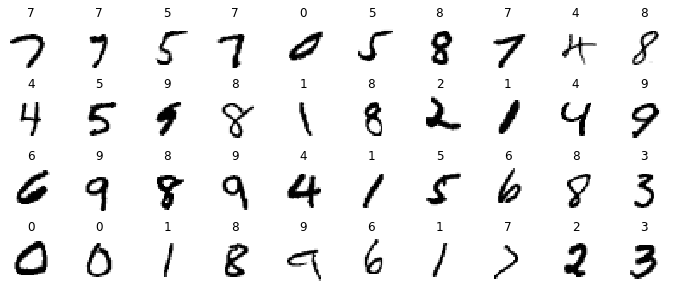

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building our Model

Up to this point, we finished preparing our data for training and testing. Our task was to build a neural network that can achieve ~98% accuracy and the following is our attempts on making this happen.

### Progress Log 3

Now, let's build our neural network. Initially, we built a random model with 3 layers, picked the learning rate of 0.001, and trained with 30 epochs as in the following.

In [8]:
# reset the model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.layers

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 4s 78us/sample - loss: 1.5487 - accuracy: 0.7689 - val_loss: 0.4672 - val_accuracy: 0.8688
Epoch 2/30
48000/48000 [==============================] - 3s 68us/sample - loss: 0.3715 - accuracy: 0.8940 - val_loss: 0.3559 - val_accuracy: 0.9011
Epoch 3/30
48000/48000 [==============================] - 3s 68us/sample - loss: 0.2670 - accuracy: 0.9224 - val_loss: 0.2961 - val_accuracy: 0.9192
Epoch 4/30
48000/48000 [==============================] - 3s 70us/sample - loss: 0.2130 - accuracy: 0.9370 - val_loss: 0.2598 - val_accuracy: 0.9304
Epoch 5/30
48000/48000 [==============================] - 3s 69us/sample - loss: 0.1786 - accuracy: 0.9468 - val_loss: 0.2561 - val_accuracy: 0.9331
Epoch 6/30
48000/48000 [==============================] - 3s 70us/sample - loss: 0.1553 - accuracy: 0.9535 - val_loss: 0.2448 - val_accuracy: 0.9375
Epoch 7/30
48000/48000 [==============================] 

In [14]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.2577 - accuracy: 0.9543


[0.25766879551840555, 0.9543]

<b>Observation:</b> the model achieved the accuracy of 95.43% on the test set which was pretty good but still worse than the sample model given in the solution of exercise 10 in chapter 10 handson-ml notebook (~98%). Thus, we tried a few different methods to see if we can get a better model.

### Progress Log 4

First of all, we came up with a bunch of different different number of neurons per layer and different learning rate and chose the best combination for our model as shown in the following.

In [15]:
# reset the model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
def testModels(testName, layer1, layer2, layer3, learningRate, epochNumber):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(layer1, activation="relu"),
        keras.layers.Dense(layer2, activation="relu"),
        keras.layers.Dense(layer3, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=learningRate),
              metrics=["accuracy"])
    print("\n" + testName + "\nlayer1: " + str(layer1) + "\nlayer2: " + str(layer2), "\nlayer3: " + str(layer3), 
         "\nlearningRate: " + str(learningRate), "\nepochNumber: " + str(epochNumber), "\n")
    history = model.fit(X_train, y_train, epochs=epochNumber,
                    validation_data=(X_val, y_val))

In [17]:
testLayer1 = [300, 300, 500, 500, 300, 300, 500, 500, 300, 300, 500, 500, 300, 300, 500, 500]
testLayer2 = [300, 500, 300, 500, 300, 500, 300, 500, 300, 500, 300, 500, 300, 500, 300, 500]
testLayer3 = [10, 10, 10, 10, 20, 20, 20, 20, 10, 10, 10, 10, 20, 20, 20, 20]
testLearningRate = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003]
testEpochNumber = 5

for i in range(16):
    testModels("Test #" + str(i+1), testLayer1[i], testLayer2[i], testLayer3[i], testLearningRate[i], testEpochNumber)
    print("-------------------------------------------------------------")


Test #1
layer1: 300
layer2: 300 
layer3: 10 
learningRate: 0.001 
epochNumber: 5 

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 85us/sample - loss: 1.6408 - accuracy: 0.8744 - val_loss: 0.3949 - val_accuracy: 0.9197
Epoch 2/5
48000/48000 [==============================] - 4s 76us/sample - loss: 0.2525 - accuracy: 0.9384 - val_loss: 0.3036 - val_accuracy: 0.9305
Epoch 3/5
48000/48000 [==============================] - 4s 81us/sample - loss: 0.1451 - accuracy: 0.9601 - val_loss: 0.2622 - val_accuracy: 0.9425
Epoch 4/5
48000/48000 [==============================] - 4s 76us/sample - loss: 0.1013 - accuracy: 0.9707 - val_loss: 0.2491 - val_accuracy: 0.9455
Epoch 5/5
48000/48000 [==============================] - 4s 76us/sample - loss: 0.0714 - accuracy: 0.9788 - val_loss: 0.2433 - val_accuracy: 0.9469
-------------------------------------------------------------

Test #2
layer1: 300
layer2: 500 
layer3: 10 
learningRate: 0.00

Epoch 5/5
48000/48000 [==============================] - 4s 80us/sample - loss: 0.2643 - accuracy: 0.9286 - val_loss: 0.3749 - val_accuracy: 0.9102
-------------------------------------------------------------

Test #10
layer1: 300
layer2: 500 
layer3: 10 
learningRate: 0.003 
epochNumber: 5 

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 94us/sample - loss: 2.7964 - accuracy: 0.5719 - val_loss: 0.8963 - val_accuracy: 0.8036
Epoch 2/5
48000/48000 [==============================] - 4s 86us/sample - loss: 0.6729 - accuracy: 0.8550 - val_loss: 0.5680 - val_accuracy: 0.8851
Epoch 3/5
48000/48000 [==============================] - 4s 89us/sample - loss: 0.4829 - accuracy: 0.8954 - val_loss: 0.5000 - val_accuracy: 0.8969
Epoch 4/5
48000/48000 [==============================] - 4s 89us/sample - loss: 0.3857 - accuracy: 0.9135 - val_loss: 0.4242 - val_accuracy: 0.9092
Epoch 5/5
48000/48000 [==============================] - 4s 83u

<b>Observation:</b> from the result above, we chose the models from test 4 and 8 (as they had the best result) to fully train and this time we used the a different number of epochs (i.e. 50) to see if it yields a better result. Furthermore, starting from test #9, we can see that the loss went up with learning rate 0.003.

### Progress Log 5 & 6

We defined a method that builds a neural network model with some given parameters and used this method to build separate models for the two test cases that we mentioned above (test 4 and 8) and evaluate both of them on the testing set. 

In [18]:
def build_model(n_hidden, n_neurons, n_softmax, learning_rate, input_shape=[28, 28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons[layer], activation="relu"))
    model.add(keras.layers.Dense(n_softmax, activation="softmax"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [19]:
# reset the model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
# Test 4
n_hidden = 2
neurons_per_layer = [500, 500]
n_softmax = 10
model4 = build_model(n_hidden, neurons_per_layer, n_softmax, 0.001)

In [21]:
history = model4.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 131us/sample - loss: 1.7046 - accuracy: 0.8976 - val_loss: 0.4533 - val_accuracy: 0.9320
Epoch 2/50
48000/48000 [==============================] - 6s 123us/sample - loss: 0.2079 - accuracy: 0.9581 - val_loss: 0.3251 - val_accuracy: 0.9460
Epoch 3/50
48000/48000 [==============================] - 7s 141us/sample - loss: 0.0873 - accuracy: 0.9770 - val_loss: 0.2939 - val_accuracy: 0.9531
Epoch 4/50
48000/48000 [==============================] - 6s 124us/sample - loss: 0.0372 - accuracy: 0.9894 - val_loss: 0.3013 - val_accuracy: 0.9520
Epoch 5/50
48000/48000 [==============================] - 6s 126us/sample - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.2795 - val_accuracy: 0.9553
Epoch 6/50
48000/48000 [==============================] - 6s 121us/sample - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.2768 - val_accuracy: 0.9578
Epoch 7/50
48000/48000 [==========================

In [22]:
model4.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.2775 - accuracy: 0.9603


[0.27745574705852366, 0.9603]

In [23]:
# reset the model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
# Test 8
n_hidden = 2
neurons_per_layer = [500, 500]
n_softmax = 20
model8 = build_model(n_hidden, neurons_per_layer, n_softmax, 0.001)

In [25]:
history = model8.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 132us/sample - loss: 1.7189 - accuracy: 0.8977 - val_loss: 0.4552 - val_accuracy: 0.9260
Epoch 2/50
48000/48000 [==============================] - 6s 124us/sample - loss: 0.2147 - accuracy: 0.9562 - val_loss: 0.3307 - val_accuracy: 0.9430
Epoch 3/50
48000/48000 [==============================] - 6s 126us/sample - loss: 0.0915 - accuracy: 0.9771 - val_loss: 0.2915 - val_accuracy: 0.9497
Epoch 4/50
48000/48000 [==============================] - 6s 126us/sample - loss: 0.0436 - accuracy: 0.9871 - val_loss: 0.2773 - val_accuracy: 0.9521
Epoch 5/50
48000/48000 [==============================] - 6s 132us/sample - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.2632 - val_accuracy: 0.9548
Epoch 6/50
48000/48000 [==============================] - 6s 130us/sample - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.2655 - val_accuracy: 0.9557
Epoch 7/50
48000/48000 [==========================

In [26]:
model8.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.2608 - accuracy: 0.9630


[0.26083037926554237, 0.963]

<b>Observation:</b> the accuracy score did improve (~96%), but still not as good as our goal (i.e. 98%). But this result clarified that a more complex model in terms of number of neurons in each layer and more training epochs does help improve the performance. However, we had some doubts about how the higher number of epochs would improve the accuracy score, maybe it did, but definitely not significantly.

### Progress Log 7

At this point, we applied hyperparameters tuning (using Grid Search) to see if it helped improving the performance of the model. The idea was adapted from section "Hyperparameters Tuning" in the chapter 10 notebook.

In [27]:
# reset the model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
def build_model_keras(n_hidden=2, n_neurons=300, n_softmax=10, learning_rate=0.001, input_shape=[28, 28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(n_softmax, activation="softmax"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [29]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model_keras)

In [30]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_val, y_val),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 85us/sample - loss: 1.6408 - accuracy: 0.8744 - val_loss: 0.3949 - val_accuracy: 0.9197
Epoch 2/100
48000/48000 [==============================] - 4s 76us/sample - loss: 0.2525 - accuracy: 0.9384 - val_loss: 0.3036 - val_accuracy: 0.9305
Epoch 3/100
48000/48000 [==============================] - 4s 76us/sample - loss: 0.1451 - accuracy: 0.9601 - val_loss: 0.2622 - val_accuracy: 0.9425
Epoch 4/100
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1013 - accuracy: 0.9707 - val_loss: 0.2491 - val_accuracy: 0.9455
Epoch 5/100
48000/48000 [==============================] - 4s 76us/sample - loss: 0.0714 - accuracy: 0.9788 - val_loss: 0.2433 - val_accuracy: 0.9469
Epoch 6/100
48000/48000 [==============================] - 4s 76us/sample - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.2392 - val_accuracy: 0.9485
Epoch 7/100
48000/48000 [=========================

In [31]:
keras_reg.score(X_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.2438 - accuracy: 0.9542


-0.24375572328867828

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

In [33]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [2, 3, 4],
    "n_neurons": np.arange(1, 501),
    "n_softmax": [10, 20],
    "learning_rate": reciprocal(1e-3, 3e-3),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001509041041403342, n_hidden=2, n_neurons=271, n_softmax=10 
Train on 32000 samples, validate on 12000 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


32000/32000 [==============================] - 3s 90us/sample - loss: 2.1547 - accuracy: 0.8406 - val_loss: 0.5680 - val_accuracy: 0.8852
Epoch 2/100
32000/32000 [==============================] - 3s 80us/sample - loss: 0.3323 - accuracy: 0.9213 - val_loss: 0.4492 - val_accuracy: 0.9168
Epoch 3/100
32000/32000 [==============================] - 3s 78us/sample - loss: 0.2067 - accuracy: 0.9455 - val_loss: 0.3894 - val_accuracy: 0.9251
Epoch 4/100
32000/32000 [==============================] - 3s 79us/sample - loss: 0.1412 - accuracy: 0.9600 - val_loss: 0.3778 - val_accuracy: 0.9268
Epoch 5/100
32000/32000 [==============================] - 2s 78us/sample - loss: 0.0996 - accuracy: 0.9699 - val_loss: 0.3725 - val_accuracy: 0.9302
Epoch 6/100
32000/32000 [==============================] - 2s 77us/sample - loss: 0.0764 - accuracy: 0.9759 - val_loss: 0.3664 - val_accuracy: 0.9320
Epoch 7/100
32000/32000 [==============================] - 3s 78us/sample - loss: 0.0550 - accuracy: 0.9830 - va

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


32000/32000 [==============================] - 3s 88us/sample - loss: 2.1442 - accuracy: 0.8522 - val_loss: 0.5633 - val_accuracy: 0.8948
Epoch 2/100
32000/32000 [==============================] - 2s 78us/sample - loss: 0.2928 - accuracy: 0.9326 - val_loss: 0.3623 - val_accuracy: 0.9227
Epoch 3/100
32000/32000 [==============================] - 3s 78us/sample - loss: 0.1566 - accuracy: 0.9572 - val_loss: 0.3324 - val_accuracy: 0.9367
Epoch 4/100
32000/32000 [==============================] - 3s 81us/sample - loss: 0.0972 - accuracy: 0.9704 - val_loss: 0.3310 - val_accuracy: 0.9327
Epoch 5/100
32000/32000 [==============================] - 3s 80us/sample - loss: 0.0639 - accuracy: 0.9805 - val_loss: 0.3428 - val_accuracy: 0.9371
Epoch 6/100
32000/32000 [==============================] - 3s 80us/sample - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.3265 - val_accuracy: 0.9400
Epoch 7/100
32000/32000 [==============================] - 3s 80us/sample - loss: 0.0301 - accuracy: 0.9912 - va

32000/32000 [==============================] - 2s 66us/sample - loss: 0.0593 - accuracy: 0.9809 - val_loss: 0.3500 - val_accuracy: 0.9334
Epoch 49/100
32000/32000 [==============================] - 2s 67us/sample - loss: 0.0568 - accuracy: 0.9820 - val_loss: 0.3477 - val_accuracy: 0.9351
Epoch 50/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.0575 - accuracy: 0.9813 - val_loss: 0.3487 - val_accuracy: 0.9355
Epoch 51/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.3523 - val_accuracy: 0.9367
Epoch 52/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.3653 - val_accuracy: 0.9348
Epoch 53/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.0521 - accuracy: 0.9833 - val_loss: 0.3498 - val_accuracy: 0.9369
Epoch 54/100
32000/32000 [==============================] - 2s 67us/sample - loss: 0.0514 - accuracy: 0.985

Train on 32000 samples, validate on 12000 samples
Epoch 1/100
32000/32000 [==============================] - 2s 75us/sample - loss: 1.7302 - accuracy: 0.7487 - val_loss: 0.6415 - val_accuracy: 0.8470
Epoch 2/100
32000/32000 [==============================] - 2s 65us/sample - loss: 0.4658 - accuracy: 0.8747 - val_loss: 0.4445 - val_accuracy: 0.8875
Epoch 3/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.3515 - accuracy: 0.9069 - val_loss: 0.3727 - val_accuracy: 0.9122
Epoch 4/100
32000/32000 [==============================] - 2s 65us/sample - loss: 0.2864 - accuracy: 0.9208 - val_loss: 0.3550 - val_accuracy: 0.9148
Epoch 5/100
32000/32000 [==============================] - 2s 65us/sample - loss: 0.2498 - accuracy: 0.9297 - val_loss: 0.3166 - val_accuracy: 0.9195
Epoch 6/100
32000/32000 [==============================] - 2s 65us/sample - loss: 0.2235 - accuracy: 0.9363 - val_loss: 0.2983 - val_accuracy: 0.9227
Epoch 7/100
32000/32000 [=========================

Epoch 55/100
32000/32000 [==============================] - 2s 64us/sample - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.3701 - val_accuracy: 0.9457
Epoch 56/100
32000/32000 [==============================] - 2s 64us/sample - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.3690 - val_accuracy: 0.9447
Epoch 57/100
32000/32000 [==============================] - 2s 64us/sample - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.3710 - val_accuracy: 0.9457
Epoch 58/100
32000/32000 [==============================] - 2s 64us/sample - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.3722 - val_accuracy: 0.9438
Epoch 59/100
32000/32000 [==============================] - 2s 65us/sample - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.3752 - val_accuracy: 0.9456
Epoch 60/100
32000/32000 [==============================] - 2s 64us/sample - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.3763 - val_accuracy: 0.9448
Epoch 61/100
32000/32000 [==============================] - 2s 65us/sample - loss: 0.0218 - ac

32000/32000 [==============================] - 2s 66us/sample - loss: 0.1093 - accuracy: 0.9670 - val_loss: 0.3464 - val_accuracy: 0.9287
Epoch 62/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.1059 - accuracy: 0.9680 - val_loss: 0.3617 - val_accuracy: 0.9251
Epoch 63/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.1060 - accuracy: 0.9673 - val_loss: 0.3561 - val_accuracy: 0.9287
Epoch 64/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.1042 - accuracy: 0.9682 - val_loss: 0.3636 - val_accuracy: 0.9277
Epoch 65/100
32000/32000 [==============================] - 2s 65us/sample - loss: 0.1054 - accuracy: 0.9673 - val_loss: 0.3660 - val_accuracy: 0.9277
Epoch 66/100
32000/32000 [==============================] - 2s 65us/sample - loss: 0.1017 - accuracy: 0.9684 - val_loss: 0.3558 - val_accuracy: 0.9295
Epoch 67/100
32000/32000 [==============================] - 2s 66us/sample - loss: 0.1012 - accuracy: 0.968

Epoch 6/100
32000/32000 [==============================] - 3s 89us/sample - loss: 0.0806 - accuracy: 0.9752 - val_loss: 0.2442 - val_accuracy: 0.9363
Epoch 7/100
32000/32000 [==============================] - 3s 90us/sample - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.2392 - val_accuracy: 0.9402
Epoch 8/100
32000/32000 [==============================] - 3s 89us/sample - loss: 0.0506 - accuracy: 0.9856 - val_loss: 0.2509 - val_accuracy: 0.9383
Epoch 9/100
32000/32000 [==============================] - 3s 89us/sample - loss: 0.0389 - accuracy: 0.9897 - val_loss: 0.2371 - val_accuracy: 0.9442
Epoch 10/100
32000/32000 [==============================] - 3s 90us/sample - loss: 0.0311 - accuracy: 0.9923 - val_loss: 0.2407 - val_accuracy: 0.9439
Epoch 11/100
32000/32000 [==============================] - 3s 89us/sample - loss: 0.0254 - accuracy: 0.9939 - val_loss: 0.2386 - val_accuracy: 0.9458
Epoch 12/100
32000/32000 [==============================] - 3s 90us/sample - loss: 0.0202 - accura

32000/32000 [==============================] - 3s 91us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2829 - val_accuracy: 0.9477
Epoch 33/100
32000/32000 [==============================] - 3s 91us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2848 - val_accuracy: 0.9473
Epoch 34/100
32000/32000 [==============================] - 3s 92us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2858 - val_accuracy: 0.9481
Epoch 35/100
32000/32000 [==============================] - 3s 92us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.9477
Epoch 36/100
32000/32000 [==============================] - 3s 91us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2903 - val_accuracy: 0.9477
Epoch 37/100
32000/32000 [==============================] - 3s 90us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2916 - val_accuracy: 0.9479
Epoch 38/100
32000/32000 [==============================] - 3s 91us/sample - loss: 0.0018 - accuracy: 1.000

Epoch 9/100
32000/32000 [==============================] - 3s 100us/sample - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.2072 - val_accuracy: 0.9538
Epoch 10/100
32000/32000 [==============================] - 3s 103us/sample - loss: 0.0281 - accuracy: 0.9921 - val_loss: 0.2096 - val_accuracy: 0.9540
Epoch 11/100
32000/32000 [==============================] - 3s 98us/sample - loss: 0.0216 - accuracy: 0.9943 - val_loss: 0.2142 - val_accuracy: 0.9534
Epoch 12/100
32000/32000 [==============================] - 3s 99us/sample - loss: 0.0169 - accuracy: 0.9957 - val_loss: 0.2185 - val_accuracy: 0.9532
Epoch 13/100
32000/32000 [==============================] - 3s 98us/sample - loss: 0.0137 - accuracy: 0.9965 - val_loss: 0.2196 - val_accuracy: 0.9544
Epoch 14/100
32000/32000 [==============================] - 3s 97us/sample - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.2231 - val_accuracy: 0.9544
Epoch 15/100
32000/32000 [==============================] - 3s 100us/sample - loss: 0.0075 - 

Epoch 31/100
32000/32000 [==============================] - 3s 100us/sample - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.2741 - val_accuracy: 0.9551
Epoch 32/100
32000/32000 [==============================] - 3s 99us/sample - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.2747 - val_accuracy: 0.9548
Epoch 33/100
32000/32000 [==============================] - 3s 100us/sample - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.2765 - val_accuracy: 0.9552
Epoch 34/100
32000/32000 [==============================] - 3s 98us/sample - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.2786 - val_accuracy: 0.9557
Epoch 35/100
32000/32000 [==============================] - 3s 102us/sample - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.2779 - val_accuracy: 0.9557
Epoch 36/100
32000/32000 [==============================] - 3s 100us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2808 - val_accuracy: 0.9548
Epoch 37/100
32000/32000 [==============================] - 3s 100us/sample - loss: 0.0012

Epoch 37/100
32000/32000 [==============================] - 2s 68us/sample - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.4311 - val_accuracy: 0.9402
Epoch 38/100
32000/32000 [==============================] - 2s 69us/sample - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.4346 - val_accuracy: 0.9399
Epoch 39/100
32000/32000 [==============================] - 2s 68us/sample - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.4347 - val_accuracy: 0.9398
Epoch 40/100
32000/32000 [==============================] - 2s 68us/sample - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.4363 - val_accuracy: 0.9397
Epoch 41/100
32000/32000 [==============================] - 2s 70us/sample - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.4387 - val_accuracy: 0.9401
Epoch 42/100
32000/32000 [==============================] - 2s 68us/sample - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.4380 - val_accuracy: 0.9403
Epoch 43/100
32000/32000 [==============================] - 2s 68us/sample - loss: 0.0022 - ac

32000/32000 [==============================] - 2s 70us/sample - loss: 0.0282 - accuracy: 0.9931 - val_loss: 0.3281 - val_accuracy: 0.9406
Epoch 25/100
32000/32000 [==============================] - 2s 70us/sample - loss: 0.0268 - accuracy: 0.9932 - val_loss: 0.3346 - val_accuracy: 0.9412
Epoch 26/100
32000/32000 [==============================] - 2s 68us/sample - loss: 0.0254 - accuracy: 0.9936 - val_loss: 0.3362 - val_accuracy: 0.9423
Epoch 27/100
32000/32000 [==============================] - 2s 69us/sample - loss: 0.0232 - accuracy: 0.9947 - val_loss: 0.3402 - val_accuracy: 0.9422
Epoch 28/100
32000/32000 [==============================] - 2s 69us/sample - loss: 0.0224 - accuracy: 0.9943 - val_loss: 0.3353 - val_accuracy: 0.9433
Epoch 29/100
32000/32000 [==============================] - 2s 70us/sample - loss: 0.0207 - accuracy: 0.9952 - val_loss: 0.3379 - val_accuracy: 0.9417
Epoch 30/100
32000/32000 [==============================] - 2s 70us/sample - loss: 0.0200 - accuracy: 0.995

32000/32000 [==============================] - 2s 75us/sample - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.3677 - val_accuracy: 0.9442
Epoch 31/100
32000/32000 [==============================] - 2s 75us/sample - loss: 0.0085 - accuracy: 0.9978 - val_loss: 0.3668 - val_accuracy: 0.9444
Epoch 32/100
32000/32000 [==============================] - 2s 74us/sample - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.3733 - val_accuracy: 0.9450
Epoch 33/100
32000/32000 [==============================] - 2s 73us/sample - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.3775 - val_accuracy: 0.9440
Epoch 34/100
32000/32000 [==============================] - 2s 74us/sample - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.3745 - val_accuracy: 0.9462
Epoch 35/100
32000/32000 [==============================] - 2s 74us/sample - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.3761 - val_accuracy: 0.9460
Epoch 36/100
32000/32000 [==============================] - 2s 73us/sample - loss: 0.0067 - accuracy: 0.998

32000/32000 [==============================] - 2s 75us/sample - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.3821 - val_accuracy: 0.9457
Epoch 46/100
32000/32000 [==============================] - 2s 76us/sample - loss: 0.0167 - accuracy: 0.9952 - val_loss: 0.3861 - val_accuracy: 0.9452
Epoch 47/100
32000/32000 [==============================] - 2s 76us/sample - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.3897 - val_accuracy: 0.9446
Epoch 48/100
32000/32000 [==============================] - 2s 75us/sample - loss: 0.0143 - accuracy: 0.9959 - val_loss: 0.3923 - val_accuracy: 0.9438
Epoch 49/100
32000/32000 [==============================] - 2s 75us/sample - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.3956 - val_accuracy: 0.9430
Epoch 50/100
32000/32000 [==============================] - 2s 75us/sample - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.3964 - val_accuracy: 0.9448
Epoch 51/100
32000/32000 [==============================] - 2s 75us/sample - loss: 0.0127 - accuracy: 0.996

32000/32000 [==============================] - 2s 76us/sample - loss: 0.0107 - accuracy: 0.9973 - val_loss: 0.3857 - val_accuracy: 0.9452
Epoch 52/100
32000/32000 [==============================] - 2s 77us/sample - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.3943 - val_accuracy: 0.9452
Epoch 53/100
32000/32000 [==============================] - 2s 77us/sample - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.3894 - val_accuracy: 0.9461
Epoch 54/100
32000/32000 [==============================] - 2s 75us/sample - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.3986 - val_accuracy: 0.9458
Epoch 55/100
32000/32000 [==============================] - 2s 77us/sample - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.3985 - val_accuracy: 0.9459
Epoch 56/100
32000/32000 [==============================] - 2s 76us/sample - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.3957 - val_accuracy: 0.9445
Epoch 57/100
32000/32000 [==============================] - 2s 76us/sample - loss: 0.0084 - accuracy: 0.997

32000/32000 [==============================] - 3s 83us/sample - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.2422 - val_accuracy: 0.9513
Epoch 25/100
32000/32000 [==============================] - 3s 83us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2424 - val_accuracy: 0.9517
Epoch 26/100
32000/32000 [==============================] - 3s 84us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2440 - val_accuracy: 0.9507
Epoch 27/100
32000/32000 [==============================] - 3s 84us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2451 - val_accuracy: 0.9519
Epoch 28/100
32000/32000 [==============================] - 3s 84us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2458 - val_accuracy: 0.9521
Epoch 29/100
32000/32000 [==============================] - 3s 83us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2475 - val_accuracy: 0.9522
Epoch 30/100
32000/32000 [==============================] - 3s 83us/sample - loss: 0.0020 - accuracy: 1.000

32000/32000 [==============================] - 3s 87us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2561 - val_accuracy: 0.9476
Epoch 19/100
32000/32000 [==============================] - 3s 87us/sample - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.2556 - val_accuracy: 0.9488
Epoch 20/100
32000/32000 [==============================] - 3s 87us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2579 - val_accuracy: 0.9482
Epoch 21/100
32000/32000 [==============================] - 3s 88us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2590 - val_accuracy: 0.9493
Epoch 22/100
32000/32000 [==============================] - 3s 88us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2600 - val_accuracy: 0.9485
Epoch 23/100
32000/32000 [==============================] - 3s 88us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2614 - val_accuracy: 0.9495
Epoch 24/100
32000/32000 [==============================] - 3s 87us/sample - loss: 0.0021 - accuracy: 1.000

32000/32000 [==============================] - 4s 120us/sample - loss: 0.0433 - accuracy: 0.9878 - val_loss: 0.2052 - val_accuracy: 0.9453
Epoch 5/100
32000/32000 [==============================] - 4s 120us/sample - loss: 0.0201 - accuracy: 0.9955 - val_loss: 0.2025 - val_accuracy: 0.9511
Epoch 6/100
32000/32000 [==============================] - 4s 122us/sample - loss: 0.0089 - accuracy: 0.9990 - val_loss: 0.1945 - val_accuracy: 0.9543
Epoch 7/100
32000/32000 [==============================] - 4s 119us/sample - loss: 0.0047 - accuracy: 0.9999 - val_loss: 0.1978 - val_accuracy: 0.9551
Epoch 8/100
32000/32000 [==============================] - 4s 119us/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1986 - val_accuracy: 0.9558
Epoch 9/100
32000/32000 [==============================] - 4s 121us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1995 - val_accuracy: 0.9560
Epoch 10/100
32000/32000 [==============================] - 4s 121us/sample - loss: 0.0019 - accuracy: 1.0

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 78.9min finished


48000/48000 [==============================] - 6s 120us/sample - loss: 0.9633 - accuracy: 0.8798 - val_loss: 0.2471 - val_accuracy: 0.9301
Epoch 2/100
48000/48000 [==============================] - 5s 112us/sample - loss: 0.1561 - accuracy: 0.9537 - val_loss: 0.1901 - val_accuracy: 0.9454
Epoch 3/100
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0914 - accuracy: 0.9724 - val_loss: 0.1684 - val_accuracy: 0.9517
Epoch 4/100
48000/48000 [==============================] - 5s 112us/sample - loss: 0.0567 - accuracy: 0.9831 - val_loss: 0.1570 - val_accuracy: 0.9580
Epoch 5/100
48000/48000 [==============================] - 5s 113us/sample - loss: 0.0361 - accuracy: 0.9901 - val_loss: 0.1574 - val_accuracy: 0.9577
Epoch 6/100
48000/48000 [==============================] - 5s 113us/sample - loss: 0.0225 - accuracy: 0.9942 - val_loss: 0.1611 - val_accuracy: 0.9567
Epoch 7/100
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0135 - accuracy: 0.99

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016F315DB448>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016F375A0E08>,
                                        'n_hidden': [2, 3, 4],
                                        'n_neurons': array([  1,   2,   3,   4,   5,   6,   7,   8...
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499, 500]),
                                        'n_softmax': [10, 20]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
 

In [34]:
rnd_search_cv.best_params_

{'learning_rate': 0.0023693222883062726,
 'n_hidden': 4,
 'n_neurons': 364,
 'n_softmax': 10}

In [35]:
rnd_search_cv.best_score_

-0.21286418770933294

In [36]:
rnd_search_cv.best_estimator_

In [37]:
model = rnd_search_cv.best_estimator_.model
model

In [38]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.1610 - accuracy: 0.9669


[0.16099024338480403, 0.9669]

<b>Observation</b>: the accuracy score improved a bit more compared to the previous attempt but it's not enough. The accuracy scores through out the grid search ranged from ~95-96% which was a bit encouraging so we decided to take a look back at how we process the data from the very beginning to see if we could do something with it to help us achieve the goal.

### Progress Log 8

At this point, we decided to scale the data just like what the chapter notebook did and train the best model we obtained above on the scaled set to see if we could make any improvement.

In [39]:
X_val_scaled, X_train_scaled, X_test_scaled = X_val / 255., X_train / 255., X_test / 255.

In [40]:
# reset the model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
model = rnd_search_cv.best_estimator_.model
model

In [42]:
history = model.fit(X_train_scaled, y_train, epochs=100,
                  validation_data=(X_val_scaled, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 123us/sample - loss: 1.7548 - accuracy: 0.9256 - val_loss: 0.8441 - val_accuracy: 0.8767
Epoch 2/100
48000/48000 [==============================] - 6s 116us/sample - loss: 0.4918 - accuracy: 0.8909 - val_loss: 0.3643 - val_accuracy: 0.9018
Epoch 3/100
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3124 - accuracy: 0.9129 - val_loss: 0.2907 - val_accuracy: 0.9205
Epoch 4/100
48000/48000 [==============================] - 6s 116us/sample - loss: 0.2595 - accuracy: 0.9259 - val_loss: 0.2552 - val_accuracy: 0.9293
Epoch 5/100
48000/48000 [==============================] - 6s 116us/sample - loss: 0.2277 - accuracy: 0.9342 - val_loss: 0.2282 - val_accuracy: 0.9365
Epoch 6/100
48000/48000 [==============================] - 6s 116us/sample - loss: 0.2040 - accuracy: 0.9406 - val_loss: 0.2086 - val_accuracy: 0.9404
Epoch 7/100
48000/48000 [===================

In [43]:
model.evaluate(X_test_scaled, y_test)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.0815 - accuracy: 0.9756


[0.08152713977500098, 0.9756]

<b>Observation</b>: the accuracy did improve compared to the ones of the previous attempts, still not 98% as we expected, but very close. However, we clarified ourselves another fact that scaling the dataset does matter.

## Full Documentation of Progress Log

The log includes two kinds of entries that we came across whilst working on this assignment, they are problems and investigations. The following is our list of problem-solution pairs. Each entry corresponds to a checkpoint tag (i.e. "Progress Log [number]") throughout the process of building the neural network.

1. We realised that in order to use tensorflow (i.e. import the package for furture use), we had to have it installed beforehand. After spending a while to do some google search (i.e. choosing what is the most reliable link to follow), we managed to find a solution which is the following link https://www.tensorflow.org/install

2. Both of us had the up-to-date version of the chapter 10 notebook and we knew that there were already a solution for exercise 10, so we were confused about what exactly we had to do for this lab. After reading Prof. Basye's email, we decided that we would try processing the training and test sets in some different ways to see how it would affect the accuracy score in the end. For example, we would use a different ratio to split the full training set into validation and smaller training sets and not scale the sets by dividing by 255 (i.e. just leave them be) to see how our model would react to them. 

3. Initially, we built a random model which is kind of similar to one of the models in the chapter 10 notebook but we picked a different learning rate (layer1 = 300, layer2 = 100, layer3 = 10, learningRate = 1e-3, epochs = 30). The model achieved an accuracy score of about 94% which was pretty good in general, but our goal was to come up with a model ourselves that can achieve at least pretty much the same accuracy score as the one in the chapter notebook. Still, we considered that as a good start.

4. In order to try many different neural networks at once we figured that looking at only the first few epochs would give a good indication of what the total accuracy score would be after 30-50 epochs. We set up a for loop and looped through 16 different tests with different values for layer1, layer2, layer3, and learningRate. From that we found two tests in particular that had above a 95% accuracy after only 5 epochs. We then these two tests at 50 epochs to see what accuracy score we could get. Both of these tests had values:

    layer1 = 500, layer2 = 500, learningRate = 0.001 with the only difference being layer3 = 10 and 20 respectively.

5. With these two tests being our best from our earlier for loop we were surprised to find that both of them only received 96.25% and 96.24% accuracy respectively, neither being above or close to ur 98% accuracy goal. At this point we needed to take a step back and did some more reading into the chapter 10 notebook, looking at what our ML legend Geron had done to make the NN work so well. Initially we were curious about two things: changing the network size (and structure) and going through more epochs. Our earlier two tests were both incredibly similar so we realized we had to change up something bigger than we had before in order to get a better result.

6. One of the first things we realized is there shouldn't be much of a need to test farther than 30 or 50 epochs. It takes a long time to run these and if you're test isn't close to 98% by 30 epochs it probably isn't going to get much closer. This can easily be seen by Geron's example where they test up to 100 epochs. It's clear that, especially for our purposes of testing on not very powerful laptops, testing with much higher epochs than 30 isn't worth the time or the effort. Instead, we should only test above 30 epochs on a structure we are certain is going to work well.

7. We did some more testing, and this time with Keras Regressor and Grid Search. Most of the results finished at the range of 95-96% which was disappointing. This example goes back to the issue explained in log 6, that testing these networks take time and it is difficult to see exactly what would be best. At this point we are unsure exactly how to improve this model much further than ~96% accuracy. What is especially interesting is how structures that are built very differently produce surprisingly similar results. It's one of the main reasons why it is difficult to know exactly what to do next or what to change next. At this point we expect that there may be an issue in the fact that we didn't scale the data and how we splitted the datapoints at the start of this notebook.

8. We decided to scale the data just like what the chapter notebook did and then trained the best model obtained from the Grid Search on the scaled training set. As a result, our model achieved an accuracy score of 97.44% which was the best compared to the ones of the previous attempts. Even though it was not 98% as we expected, but we got closer to our goal and managed to somewhat clarify the fact that the way we processed our data at the beginning matters in terms of training the model. Also, we admit that our approach to the problem was not as professional as the solution but it still managed to do a pretty good job.